# **Tarea Nº 3**

Curso:          Fundamentos de Programación en Python para las CCSS y la Gestión Pública

Profesor:       Víctor Fuentes Campos     

- Fecha y hora de entrega: Martes 17 de diciembre, 5:59pm
- Agregue los nombres de las personas con las que discutió esta tarea: Jorge Aramburu, Pía Quispe y los foros de internet :)
- Envíe su tarea haciendo el `push` de su código a su repo en GitHub Classroom 

## **Mercado de autos usados**

Importa el conjunto de datos `neoauto_20240924.csv`
    

1. ¿Cuáles son las cinco marcas de autos de segunda mano con mayor número de publicaciones? Use `item_brand`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Solución
df_neoauto = pd.read_csv("neoauto_20240924.csv")
df_neoauto

,value,item_id,item_price,item_name,item_category,item_category_2,item_brand,item_km,item_year,item_transmission,...,item_location_province,item_tag,item_advertiser,item_credit,item_verified,item_financed_by,santander_price,item_publication_slug,item_publication_type,item_publication_type_Id
0,29200,1807331,29200.0,toyota hilux 2021,autos,Pick Up,TOYOTA,51635.0,2021,Mecánica,...,lima,Como nuevo,Erick Bazán Ubaldo,True,True,Santander,NaN,auto/usado/toyota-hilux-2021-1807331,PREMIUM,25
1,98500,1807393,98500.0,lexus lx 600 2023,autos,Camionetas Suv,LEXUS,15000.0,2023,Automática - Secuencial,...,lima,Como nuevo,Asesor Gabriel NovoCar,False,True,NaN,NaN,auto/usado/lexus-lx-600-2023-1807393,PREMIUM,25
2,16800,1739308,17800.0,bmw 520-i 2016,autos,Sedan,BMW,66000.0,2016,Automática - Secuencial,...,lima,Ocasión,Carlos Chauca,True,True,Santander,16800.0,auto/usado/bmw-520-i-2016-1739308,PREMIUM,25
3,15900,1805714,16900.0,chevrolet captiva 2021,autos,Camionetas Suv,CHEVROLET,40300.0,2021,Automática - Secuencial,...,santa,Premium,Darwin Américo Barrón Pastor,True,True,Santander,15900.0,auto/usado/chevrolet-captiva-2021-1805714,PREMIUM,25
4,12500,1806332,12500.0,dfsk glory 500 2023,autos,Camionetas Suv,DFSK,33000.0,2023,Mecánica,...,lima,Premium,GORDILLO FERNANDO,True,True,Santander,NaN,auto/usado/dfsk-glory-500-2023-1806332,PREMIUM,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4036,18000,1805535,18000.0,mini 5 puertas 2018,autos,Hatchback,MINI,32500.0,2018,Automática,...,lima,NaN,elizabeth arias,True,False,Santander,NaN,auto/usado/mini-5-puertas-2018-1805535,GRATUITO,27
4037,15000,1805482,16000.0,bmw 120i 2016,autos,Deportivo,BMW,83000.0,2016,Automática - Secuencial,...,lima,NaN,Fabrizio Canales,True,False,Santander,15000.0,auto/usado/bmw-120i-2016-1805482,GRATUITO,27
4038,9000,1805528,10000.0,volkswagen gol 2022,autos,Sedan,VOLKSWAGEN,43000.0,2022,Mecánica,...,lima,NaN,Mario Toledo Castillo,True,False,Santander,9000.0,auto/usado/volkswagen-gol-2022-1805528,GRATUITO,27
4039,30500,1805518,31500.0,bmw x5 2016,autos,Camionetas Suv,BMW,32000.0,2016,Automática - Secuencial,...,lima,NaN,SHH Hearne,True,False,Santander,30500.0,auto/usado/bmw-x5-2016-1805518,GRATUITO,27


In [3]:
df_neoauto.groupby("item_brand").size().sort_values(ascending=False).head(5)

item_brand
BMW              349
TOYOTA           338
NISSAN           285
MERCEDES BENZ    243
MAZDA            238
dtype: int64

BMW, TOYOTA, NISSAN, MERCEDES BENZ y MAZDA son las marcas con mpas publicaciones

2. ¿Cuántas camionetas SUV tienen un precio mayor a US$20,000? Use `item_category_2`

In [4]:
# Solución

suv_count = df_neoauto[(df_neoauto['item_category_2'] == "Camionetas Suv") & (df_neoauto['item_price'] > 20000)].shape[0]

suv_count



1153

1153 camionetas SUV tiene un precio mayor a 20,000 dolares

3. ¿Cuántos tipos de transmisiones existen y cuántas publicaciones contiene cada uno? Use `item_transmission` y `item_price`

In [5]:
# Solución
df_neoauto["item_transmission"].value_counts()

item_transmission
Automática - Secuencial    1731
Automática                 1289
Mecánica                   1021
Name: count, dtype: int64

4. Encuentra los 5 autos de mayor precio (`item_price`) para cada tipo de publicación (`item_publication_type`) 

In [6]:
# Solución
top_5_publication = df_neoauto[['item_publication_type', 'item_name', 'item_price']]\
    .sort_values(by='item_price', ascending=False).groupby('item_publication_type', group_keys= False).\
    apply(lambda x: x.head(5)) 
top_5_publication



C:\Users\User\AppData\Local\Temp\ipykernel_13968\2600030190.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  apply(lambda x: x.head(5))


,item_publication_type,item_name,item_price
1769,DESTACADO,bmw x7 40i 2024,115000.0
1773,DESTACADO,porsche cayenne s 2020,76500.0
1707,DESTACADO,audi q8 2022,75900.0
1772,DESTACADO,mercedes benz amg a 45s 4 matic 2022,73500.0
1639,DESTACADO,nissan patrol 2024,72995.0
3766,GRATUITO,mercedes benz gle 450 coupe 2023,100000.0
3582,GRATUITO,toyota hilux 2019,100000.0
3749,GRATUITO,mercedes benz gls 400 4matic 2018,75000.0
3587,GRATUITO,bmw m240i 2023,70500.0
3743,GRATUITO,toyota fortuner 2022,60000.0


5. ¿Cuál es el kilometraje promedio (`item_km`) de las 50 publicaciones con mayor precio (`item_price`) que ofrecen financiamiento de un banco (`item_financed_by`)?

In [7]:
# Solución
neoauto_avg_km = df_neoauto.dropna(subset=["item_financed_by"]).sort_values("item_price", ascending=False).head(50)["item_km"].mean()
neoauto_avg_km

np.float64(21695.52)

6. Encuentra los 5 autos de menos kilometraje (`item_km`) para cada una de las 3 categorías de venta (`item_tag`) con mayores publicaciones

In [8]:
# Solución

# Contar las publicaciones por categoría de venta
top_tags = df_neoauto['item_tag'].value_counts().head(3).index

# Filtrar las filas correspondientes a las 3 categorías con más publicaciones
filtered_cars = df_neoauto[df_neoauto['item_tag'].isin(top_tags)]
filtered_cars
# Encontrar los 5 autos con menos kilometraje para cada categoría
top_5_lowest_km_by_tag = (filtered_cars
    .sort_values(by='item_km', ascending=True)  # Ordenar por kilometraje ascendente
    .groupby('item_tag', group_keys=False)  # Agrupar por categoría
    .apply(lambda x: x.head(5))  # Seleccionar los 5 primeros de cada grupo
)
# Seleccionamos las columnas importantes
result_lowest_km = top_5_lowest_km_by_tag[['item_tag', 'item_name', 'item_km']]
result_lowest_km

C:\Users\User\AppData\Local\Temp\ipykernel_13968\895491594.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.head(5))  # Seleccionar los 5 primeros de cada grupo


,item_tag,item_name,item_km
1450,Premium,nissan sentra 2022,0.0
1283,Premium,chery tiggo 3 2016,0.0
1235,Premium,toyota hilux 2019,0.0
675,Premium,subaru forester 2014,0.0
505,Premium,hyundai h-1 2002,0.0
1031,Seminuevo,hyundai santa fe 2018,0.0
204,Seminuevo,mg mg gs 2020,0.0
393,Seminuevo,mazda cx-30 2024,0.0
377,Seminuevo,nissan qashqai 2024,0.0
389,Seminuevo,kia sportage 2017,0.0


7. Utilizando un `for` loop, encuentre el kilometraje máximo para las publicaciones de las siguientes marcas `["TOYOTA", "SUZUKI","HYUNDAI", "KIA"]`

In [9]:
# Solución
marcas_select = ["TOYOTA", "SUZUKI", "HYUNDAI", "KIA"]



In [10]:

# Diccionario para almacenar los resultados
max_km_by_brand = {}

# Iterar sobre cada marca y calcular el kilometraje máximo
for brand in marcas_select:
    # Filtrar las filas para la marca actual
    filtered_data = df_neoauto[df_neoauto['item_brand'] == brand]
    
    # Verificar si hay registros para esa marca
    if not filtered_data.empty:
        # Calcular el máximo de kilometraje
        max_km = filtered_data['item_km'].max()
        max_km_by_brand[brand] = max_km
    else:
        # Si no hay registros, asignar un valor por defecto (por ejemplo, 0)
        max_km_by_brand[brand] = 0

# Mostrar el resultado
print(max_km_by_brand)



{'TOYOTA': np.float64(639290.0), 'SUZUKI': np.float64(840000.0), 'HYUNDAI': np.float64(263000.0), 'KIA': np.float64(252273.0)}


8. Genere un scatterplot que muestre la relación entre precio (`item_price`) y kilometraje (`item_km`)

In [11]:
# Solución
fig = px.scatter(
    df_neoauto,
    x="item_km", 
    y="item_price", 
    labels={"x":"Eje X", "y": "Eje Y"},
    title="Gráfico interactivo: Relación entre precio y kilometraje ",
    template="plotly_dark")

fig.update_layout(width=600,height=500)
fig.show()

9. Genere un gráfico de barras con el precio promedio para cada marca. Use `item_price` y `item_brand`

In [12]:
# Solución
# Agrupamos por marca y luego obtenemos el precio promedio para cada una
neoauto_avg_price = df_neoauto.groupby("item_brand")["item_price"].mean()
neoauto_avg_price


item_brand
ALFA-ROMEO        5500.000000
ASTON MARTIN    182963.333333
AUDI             26621.618750
AUSTIN               1.000000
BAIC              9831.666667
                    ...      
SWM              14000.000000
TOYOTA           23469.026627
TRIUMPH          18900.000000
VOLKSWAGEN       16136.983051
VOLVO            30185.000000
Name: item_price, Length: 73, dtype: float64

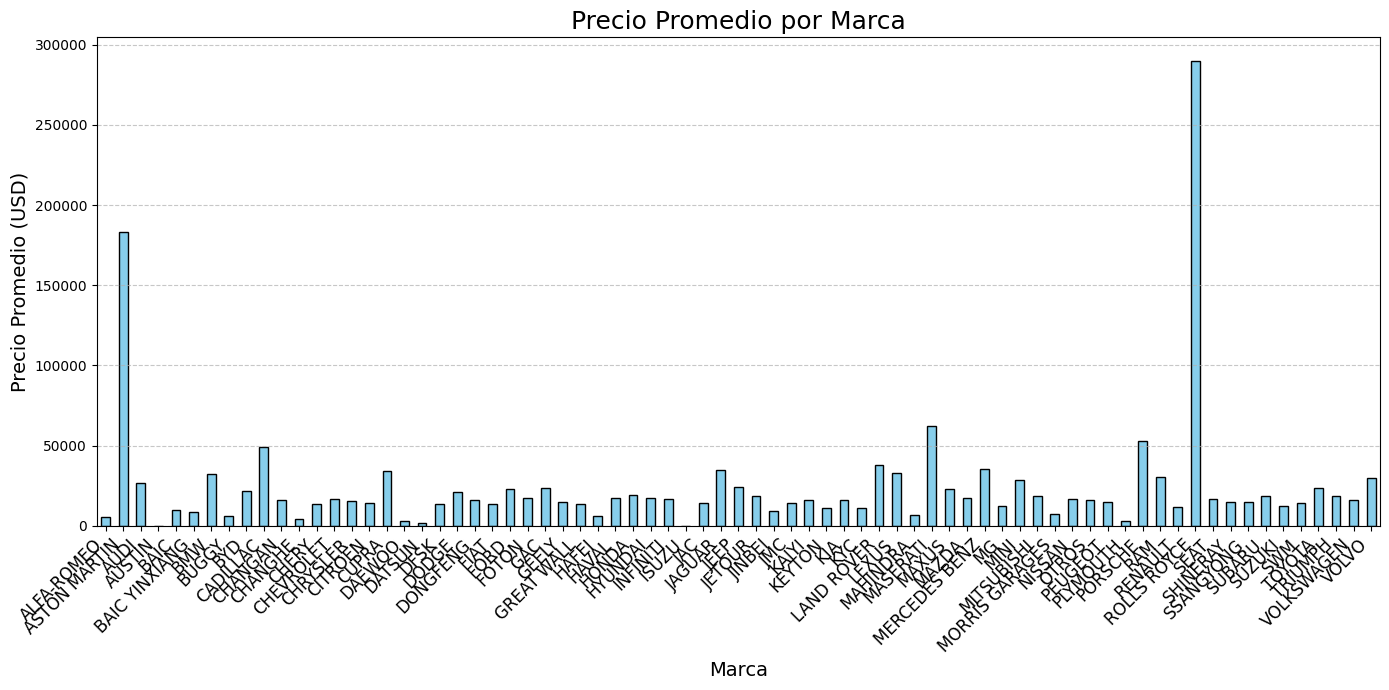

In [13]:
#Creamos el grafico 
# Crear el gráfico de barras con etiquetas ajustadas para mejor legibilidad
plt.figure(figsize=(14, 7))
neoauto_avg_price.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Precio Promedio por Marca', fontsize=18)
plt.xlabel('Marca', fontsize=14)
plt.ylabel('Precio Promedio (USD)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotación y ajuste de las etiquetas
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Asegura que las etiquetas no se superpongan
plt.show()



10. Genere dos histogramas para las distribuciones del precio (`item_price`) y el kilometraje (`item_km`)

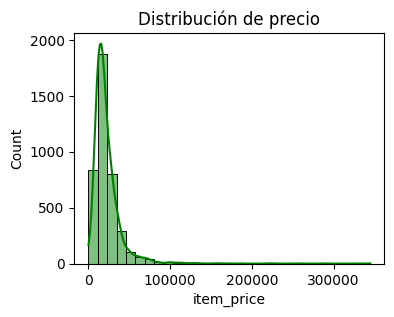

In [14]:
# Solución
#Primer histograma
plt.figure(figsize=(4,3))
sns.histplot(df_neoauto["item_price"], bins=30, color="green", kde=True)
plt.title("Distribución de precio")
plt.show()

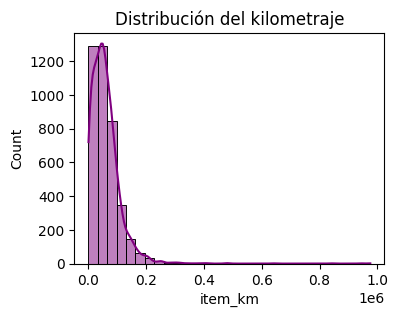

In [15]:
#Segundo histograma
plt.figure(figsize=(4,3))
sns.histplot(df_neoauto["item_km"], bins=30, color="purple", kde=True)
plt.title("Distribución del kilometraje")
plt.show()

## **Gastos del hogar**

Descargue el módulo Sumaria de la Enaho 2023. Para ello, utilice la página de [microdatos del INEI](https://proyectos.inei.gob.pe/microdatos/).

>Ojo: debe utilizar la encuesta `ENAHO Metología ACTUALIZADA` del tipo `Condiciones de Vida y Pobreza - ENAHO` y período `Anual - (Ene-Dic)`

In [16]:
sumaria_2023 = pd.read_csv("Sumaria-2023.csv", encoding= "latin1")
sumaria_2023

,AÑO,MES,CONGLOME,VIVIENDA,HOGAR,UBIGEO,DOMINIO,ESTRATO,MIEPERHO,TOTMIEHO,...,LD,ESTRSOCIAL,LINPE,LINEA,POBREZA,LINEAV,POBREZAV,FACTOR07,NCONGLOME,SUB_CONGLOME
0,2023,1,5030,2,11,10201,7,4,4,4,...,0.809237,4,244.489227,401.320129,3,680.967834,4,118.374542,6618,0
1,2023,1,5030,11,11,10201,7,4,3,3,...,0.809237,4,244.489227,401.320129,3,702.599609,4,118.374542,6618,0
2,2023,1,5030,37,11,10201,7,4,4,4,...,0.809237,4,244.489227,401.320129,3,682.432678,3,118.374542,6618,0
3,2023,1,5030,45,11,10201,7,4,2,2,...,0.809237,4,244.489227,401.320129,3,702.513672,4,118.374542,6618,0
4,2023,1,5030,56,11,10201,7,4,1,1,...,0.809237,4,244.489227,401.320129,3,655.166504,4,118.374542,6618,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33881,2023,12,20670,65,11,10503,4,8,1,1,...,0.750040,6,217.144974,322.850830,3,635.427734,3,65.991585,7051,0
33882,2023,12,20670,66,11,10503,4,8,5,5,...,0.750040,6,217.144974,322.850830,3,660.352051,3,65.991585,7051,0
33883,2023,12,20670,67,11,10503,4,8,5,5,...,0.750040,6,217.144974,322.850830,3,641.257874,3,65.991585,7051,0
33884,2023,12,20670,68,11,10503,4,8,1,1,...,0.750040,6,217.144974,322.850830,3,631.630432,4,65.991585,7051,0


1. Genere un gráfico de barras con el gasto promedio anual por hogar según dominio geográfico? Use `gashog2d` y `dominio`. Para esta pregunta no consideraremos el factor de expansión (`factor07`)

In [17]:
# Creamos un subset que contenga el gasto promedio anual por dominio geografico
avg_gashog2d = sumaria_2023.groupby("DOMINIO")["GASHOG2D"].mean()

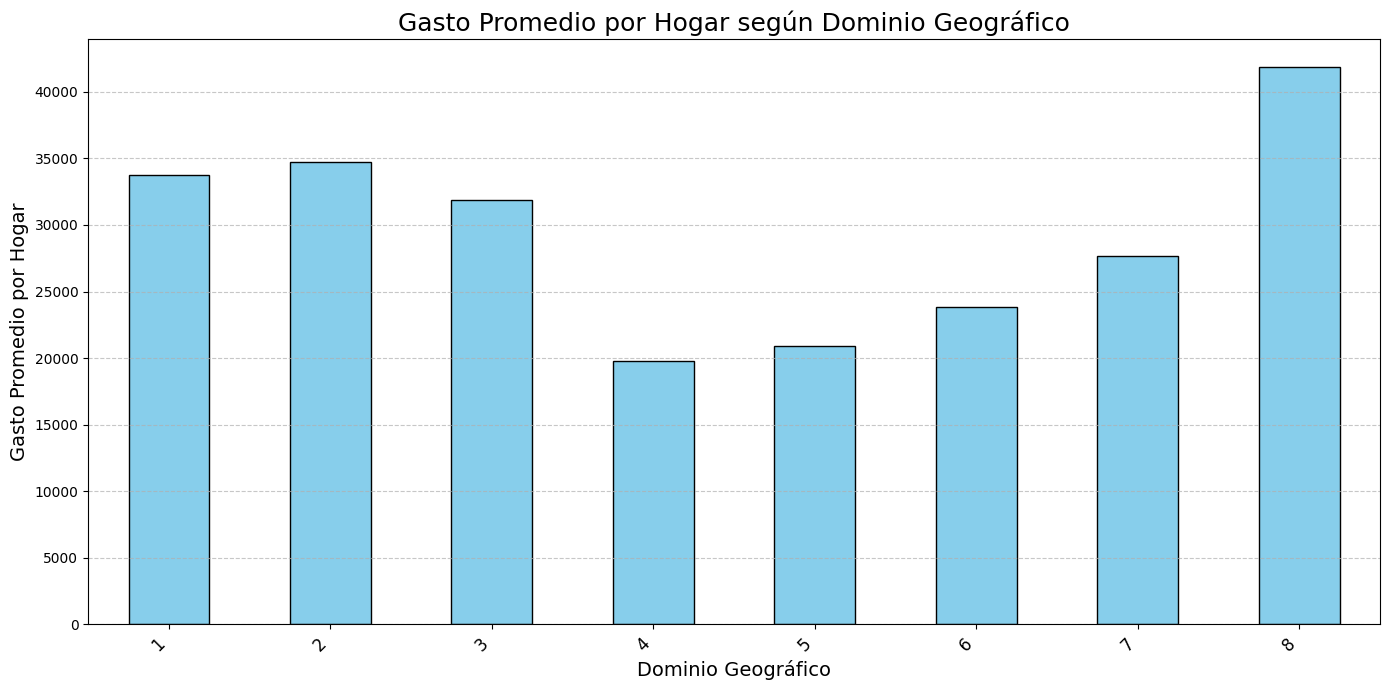

In [18]:
# Creamos el grafico
plt.figure(figsize=(14, 7))
avg_gashog2d.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Gasto Promedio por Hogar según Dominio Geográfico", fontsize=18)
plt.xlabel('Dominio Geográfico', fontsize=14)
plt.ylabel('Gasto Promedio por Hogar', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotación y ajuste de las etiquetas
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Asegura que las etiquetas no se superpongan
plt.show()

2. Genere un gráfico de barras con el gasto promedio anual por **persona** según dominio geográfico? Use `gashog2d`, `mieperho` y `dominio`. Para esta pregunta no consideraremos el factor de expansión (`factor07`)

In [19]:
# Creamos un subset que contenga el gasto promedio anual por persona según dominio geografico
gasto_promedio = sumaria_2023.groupby("DOMINIO").agg({"MIEPERHO":"sum", "GASHOG2D":"mean"})
gasto_promedio

,MIEPERHO,GASHOG2D
DOMINIO,,
1,17259,33753.945299
2,10777,34692.020420
3,6963,31865.821523
4,6429,19801.222999
5,17298,20926.490626
6,13541,23816.581016
7,25718,27667.840957
8,13868,41877.972859


<Figure size 1400x700 with 0 Axes>

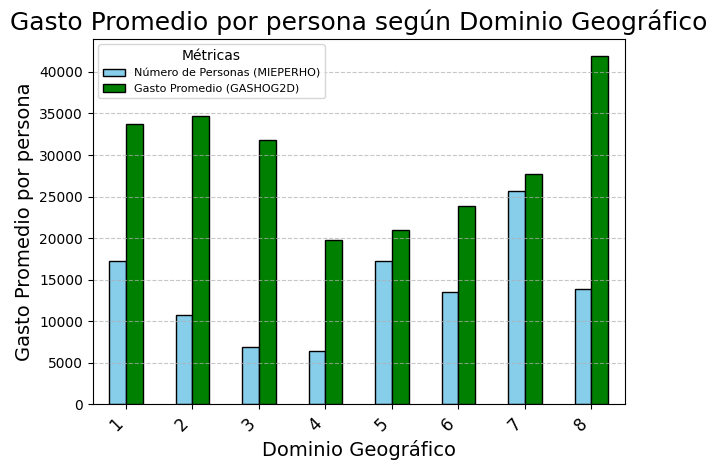

In [20]:
#Generamos el gráfico
plt.figure(figsize=(14, 7))
gasto_promedio.plot(kind='bar', color=['skyblue',"green"], edgecolor='black')
plt.title("Gasto Promedio por persona según Dominio Geográfico", fontsize=18)
plt.xlabel('Dominio Geográfico', fontsize=14)
plt.ylabel('Gasto Promedio por persona', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotación y ajuste de las etiquetas
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Métricas", labels=["Número de Personas (MIEPERHO)", "Gasto Promedio (GASHOG2D)"], fontsize=8)
plt.tight_layout()  # Asegura que las etiquetas no se superpongan
plt.show()

3. Para cada categoría de la variable (`pobreza`), calcule el ingreso total per cápita del hogar (`inghog2d`). Use `inghog2d`, `mieperho` y `pobreza`. Para esta pregunta no consideraremos el factor de expansión (`factor07`)

In [21]:
# Creamos un subset para calcular el ingreso total por hogar segpun pobreza
ingreso_total = sumaria_2023.groupby("POBREZA").agg({"MIEPERHO":"sum","INGHOG2D":"sum"})
ingreso_total

,MIEPERHO,INGHOG2D
POBREZA,,
1,7276,2.294500e+07
2,23068,1.250690e+08
3,81509,1.104178e+09


In [22]:

# Asegurarse de que el índice sea una columna
ingreso_total = ingreso_total.reset_index()

# Crear gráfico de barras
fig = px.bar(
    ingreso_total,
    x='POBREZA',  # Columna correcta para eje X
    y='INGHOG2D',  # Columna correcta para eje Y
    title="Ingreso Total por Nivel de Pobreza",
    labels={'POBREZA': 'Nivel de Pobreza', 'INGHOG2D': 'Ingreso Total'},
    template='ggplot2'
)

# Ajustar tamaño del gráfico
fig.update_layout(width=600, height=500)
fig.show()



4. Calcule el ahorro promedio de los hogares definido como la diferencia entre el ingreso del hogar (`inghog2d`) y el gasto del hogar (`gashog2d`) y guárdelo en `ahorro`. Luego, grafique el promedio del `ahorro` para cada categoría de la variable (`pobreza`). Use `inghog2d`, `mieperho` y `pobreza`. Para esta pregunta no consideraremos el factor de expansión (`factor07`)

In [23]:
# Solución
sumaria_2023["AHORRO"] = sumaria_2023["INGHOG2D"] - sumaria_2023["GASHOG2D"] # Creamos la nueva columna ahorro
ahorro_promedio = sumaria_2023.groupby("POBREZA").agg({"MIEPERHO":"sum","AHORRO":"mean"})
ahorro_promedio

,MIEPERHO,AHORRO
POBREZA,,
1,7276,4332.230073
2,23068,6039.025807
3,81509,8430.112245


In [25]:
#Creamos el grafico
ahorro_promedio = ahorro_promedio.reset_index()
# Crear gráfico de barras
fig = px.bar(
    ahorro_promedio,
    x='POBREZA',  # Columna correcta para eje X
    y='AHORRO',  # Columna correcta para eje Y
    title="Ahorro promedio por Nivel de Pobreza",
    labels={'POBREZA': 'Nivel de Pobreza', 'AHORRO': 'Ahorro Promedio'},
    template='plotly_dark'
)

# Ajustar tamaño del gráfico
fig.update_layout(width=600, height=500)
fig.show()